In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib

In [3]:
# -----------------
# Data Cleaning & Preparation
# -----------------
df = pd.read_csv(r"C:\Users\abc\Desktop\Thyroid_Cancer\data\differentiated+thyroid+cancer+recurrence\Thyroid_Diff.csv")
print("Shape before cleaning:", df.shape)
df.head()

Shape before cleaning: (383, 17)


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
# Handle missing values (Simple approach: fill with 'Unknown' or mean for numeric)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(df[col].mean())

print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


In [5]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


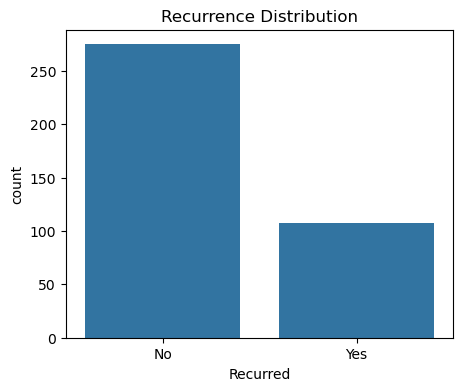

Target Class Counts:
 Recurred
No     275
Yes    108
Name: count, dtype: int64


In [7]:
# -----------------
# Exploratory Data Analysis 
# -----------------
# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Recurred', data=df)  
plt.title("Recurrence Distribution")
plt.show()

print("Target Class Counts:\n", df['Recurred'].value_counts())

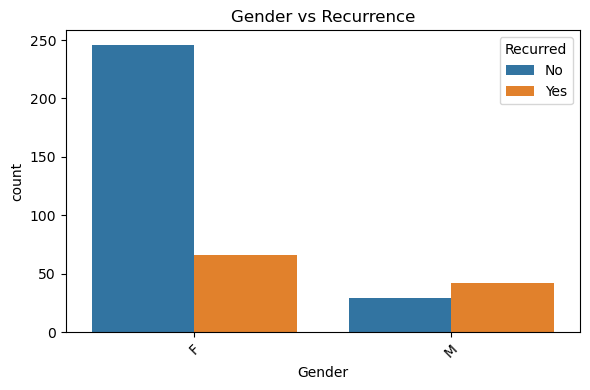

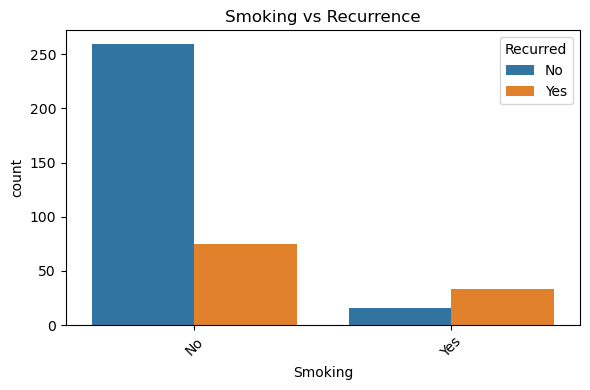

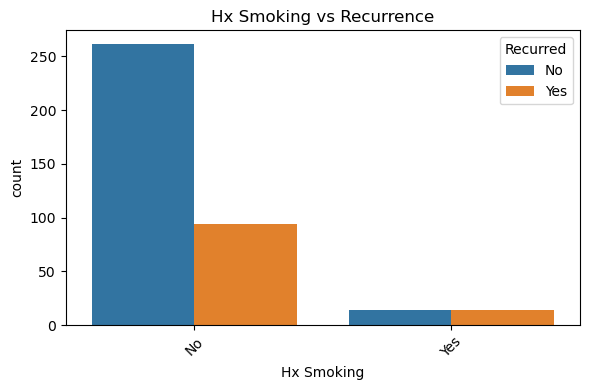

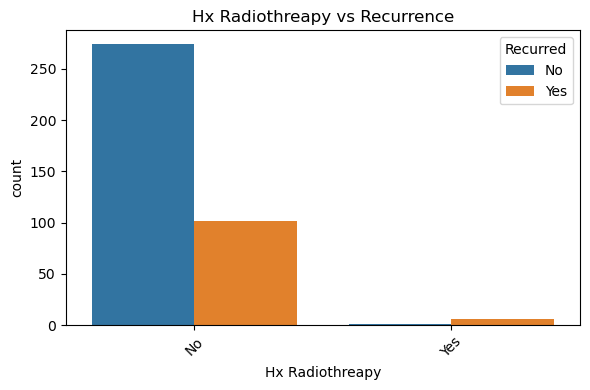

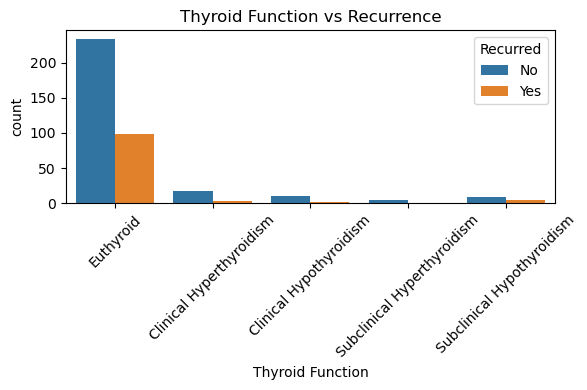

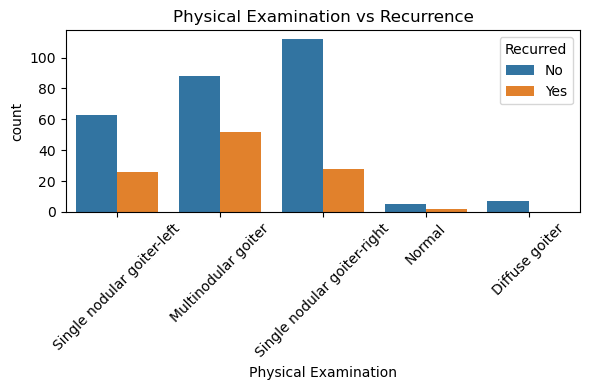

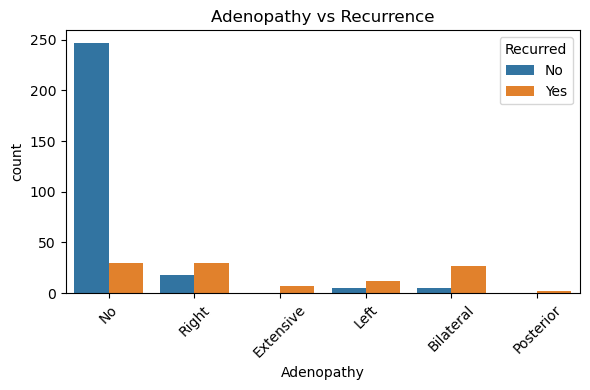

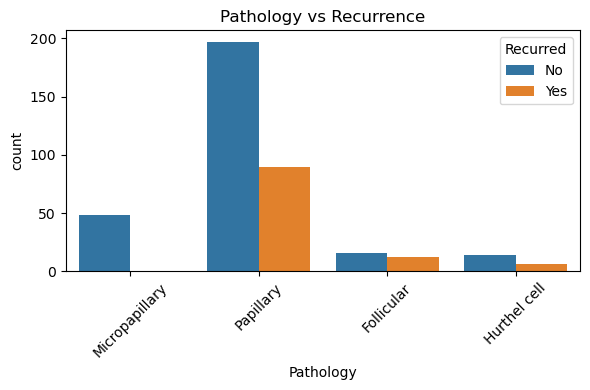

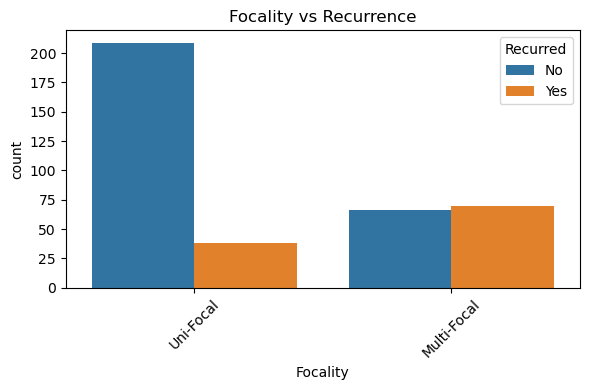

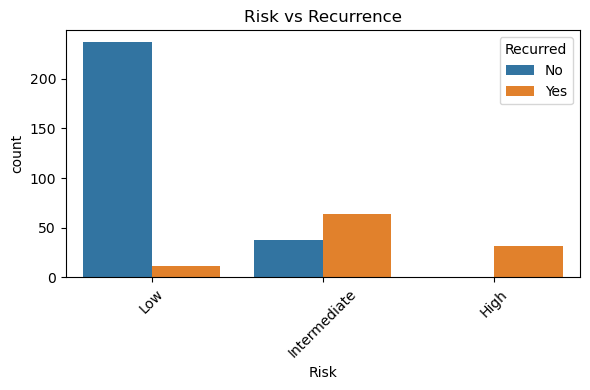

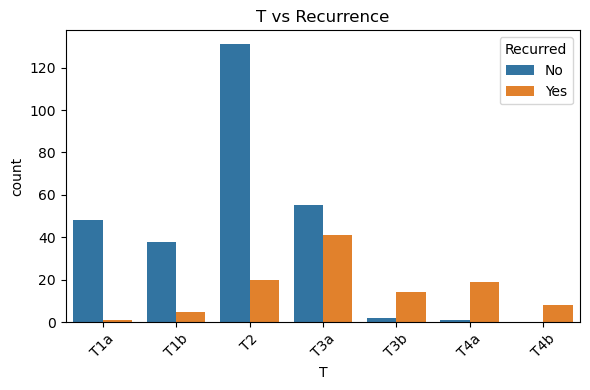

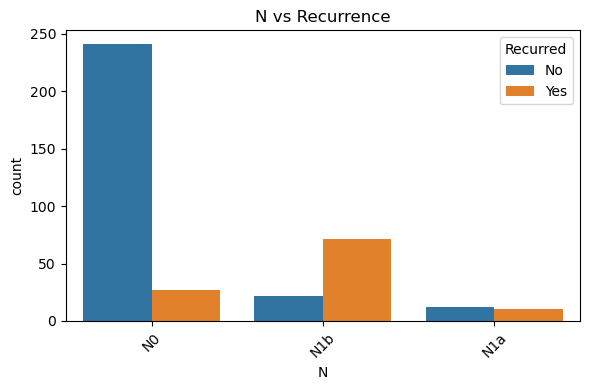

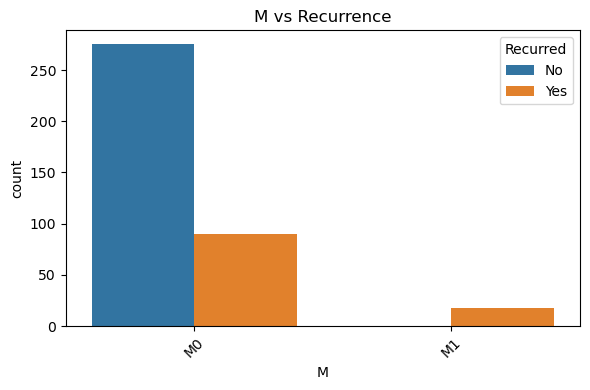

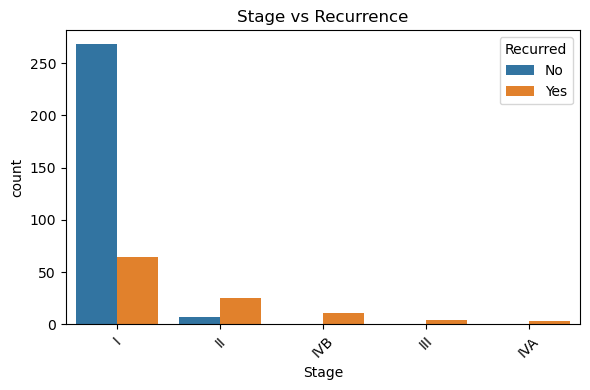

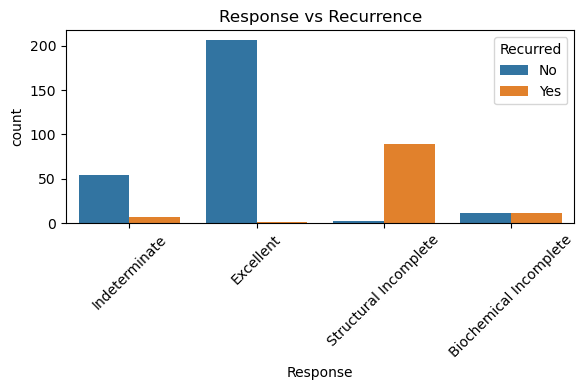

In [9]:
#  categorical vs target
df['Recurred'] = df['Recurred'].astype('category')  # ensure categorical for hue

for col in cat_cols:
    if col != 'Recurred':
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, data=df, hue='Recurred') 
        plt.title(f"{col} vs Recurrence")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [10]:
# -----------------
# Encoding Categorical Variables
# -----------------
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

In [18]:
target_le = LabelEncoder()
df['Recurred'] = target_le.fit_transform(df['Recurred'].astype(str))
label_encoders['Recurred'] = target_le

In [19]:
# -----------------
# Train-Test Split
# -----------------
X = df.drop(columns=['Recurred'])
y = df['Recurred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [20]:
print("Before SMOTE:", np.bincount(y_train))

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_train))

Before SMOTE: [220  86]
After SMOTE: [220 220]


In [21]:
# -----------------
# Train Model
# -----------------
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.88      0.95      0.91        22

    accuracy                           0.95        77
   macro avg       0.93      0.95      0.94        77
weighted avg       0.95      0.95      0.95        77

ROC-AUC Score: 0.9913223140495868


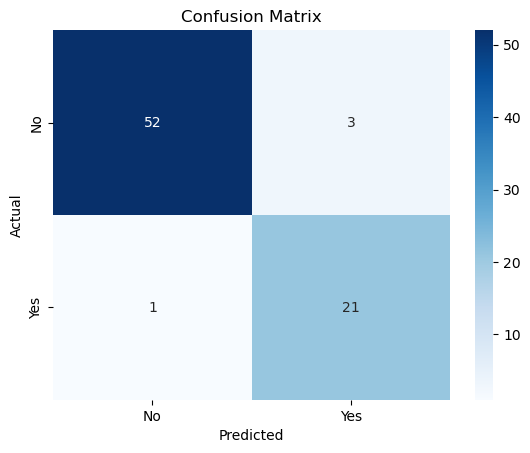

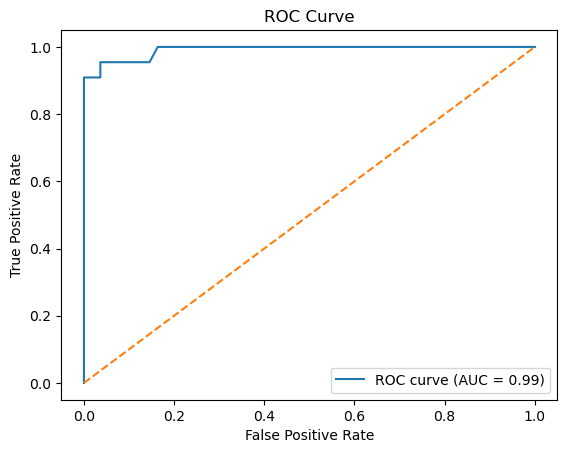

In [22]:
# -----------------
# Evaluation
# -----------------
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_le.classes_,
            yticklabels=target_le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



Top 10 Features:
 Response                0.295215
Risk                    0.272420
N                       0.106348
Age                     0.079666
Adenopathy              0.054632
T                       0.047407
Focality                0.040033
Stage                   0.031992
Physical Examination    0.023024
Thyroid Function        0.017098
dtype: float64


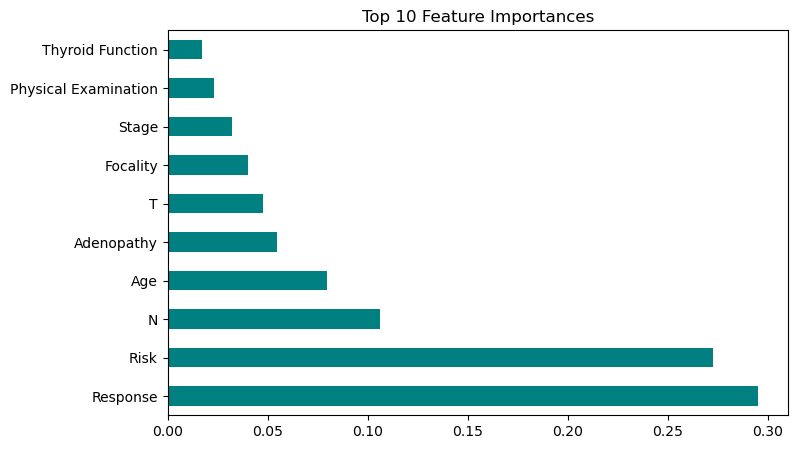

In [23]:
# -----------------
# Feature Importance
# -----------------
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Features:\n", importances.head(10))

plt.figure(figsize=(8, 5))
importances.head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances")
plt.show()

In [24]:
# -----------------
# Save Model and Encoders
# -----------------
joblib.dump(clf, r"C:\Users\abc\Desktop\Thyroid_Cancer\model\thyroid_recurrence_model.pkl")
joblib.dump(label_encoders, r"C:\Users\abc\Desktop\Thyroid_Cancer\model\label_encoders.pkl")
print("Model and encoders saved successfully.")

Model and encoders saved successfully.
